## Se muestran varios ejemplos

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
sns.set()

data=pd.read_excel("input.xlsx")


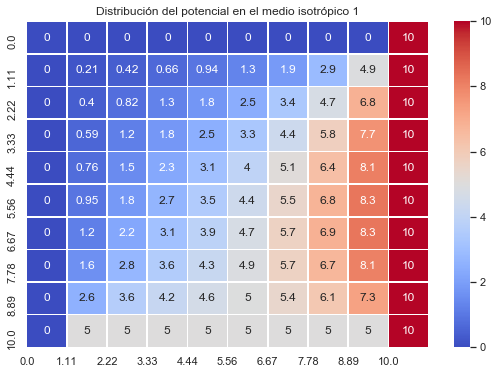

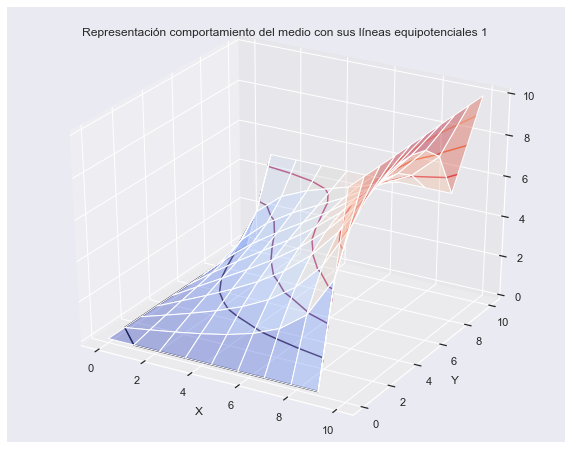

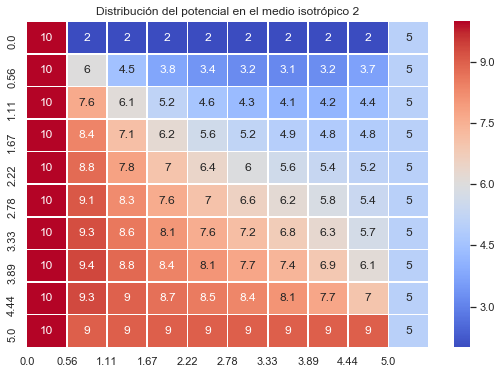

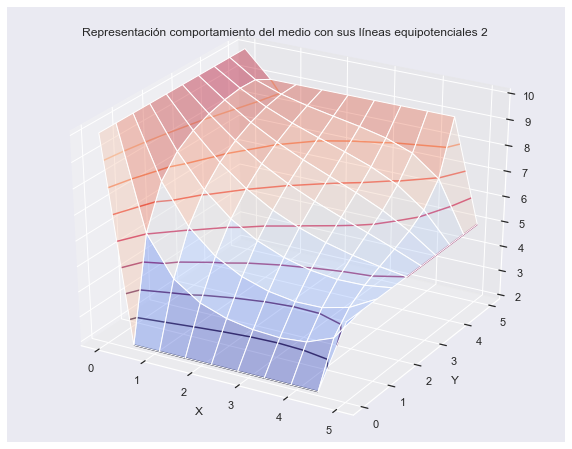

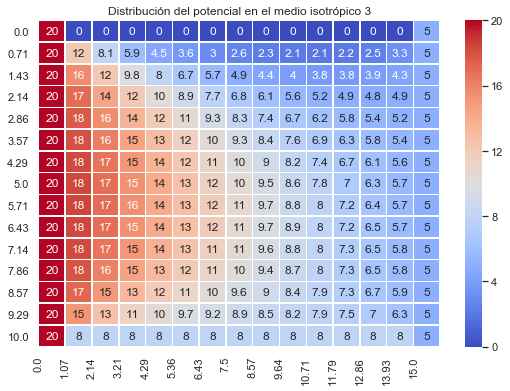

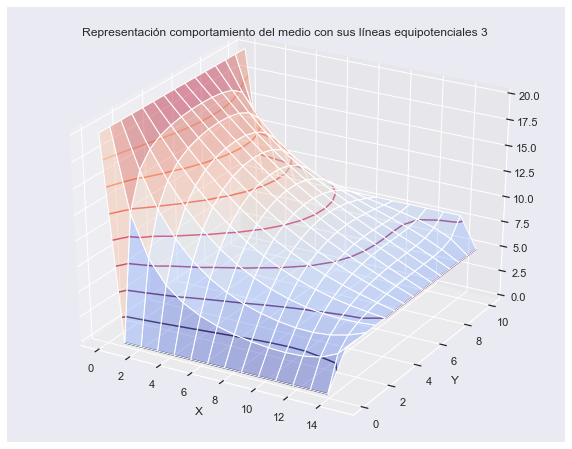

In [11]:
for i in range(len(data)):    
    A=data.x_largo[i]
    B=data.y_largo[i]
    puntos_x=data.puntos_x[i]
    puntos_y=data.puntos_y[i]

    columns=np.around(np.linspace(0,A,data.puntos_x[i]),decimals=2)
    index=np.around(np.linspace(0,B,data.puntos_y[i]),decimals=2)
    
    X=np.zeros((puntos_x,puntos_y))
    X[0]=np.ones(puntos_x)*data.y0_1[i]
    X[-1]=np.ones(puntos_x)*data.y0_2[i]
    X[:,0]=np.ones(puntos_y)*data.x0_1[i]
    X[:,-1]=np.ones(puntos_y)*data.x0_2[i]

    matrix=pd.DataFrame(X,columns=columns,index=index)

    a=float(1/A)
    b=float(1/B)

    Y=np.ones(np.shape(X))

    while np.sum(X-Y)>.001: #Se detiene cuando la diferencia entre dos iteraciones es menor a .001
        Y=np.copy(X) #Copiamos el X para tener una referencia del paso anterior
        for y in range(1,puntos_y-1):
            for x in range(1,puntos_x-1): # Aplicamos la ecuación de diferencias
                X[y][x]=(1/((1/a**2)+(1/b**2)))*((1/(2*(a**2)))*(X[y][x+1]+X[y][x-1])+(1/(2*(b**2)))*(X[y+1][x]+X[y-1][x]))

    Y=pd.DataFrame(X,columns=columns,index=index)

    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(Y, annot=True, linewidths=.5, ax=ax,cmap="coolwarm")
    ax.set_xticks(np.arange(np.shape(Y)[1]));
    ax.set_title("Distribución del potencial en el medio isotrópico {}".format(i+1));
    plt.show()

    Y.to_excel("Resultados_simulacion {}.xlsx".format(i+1))

    X2, Y2 = np.meshgrid(np.linspace(0,A,puntos_x), np.linspace(0,B,puntos_y))
    Z2=Y.values

    plt.figure(figsize=(10,8))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X2, Y2, Z2, cmap='coolwarm',alpha=.4)
    ax.contour(X2,Y2,Z2)
    ax.set_title("Representación comportamiento del medio con sus líneas equipotenciales {} ".format(i+1));
    ax.set_xlabel("X")
    ax.set_ylabel("Y");
    plt.show()